# <center> Gradient Boosted Decision Tree Classifier
Gradient boosted decision tree ensemble is trained on feature set 2

## <font color='royalblue'> Get the data </p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([6, 6, 5, ..., 0, 4, 1])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 4, ..
y_32_train                -> array([0, 3, 4, ..., 0, 3, 1])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(sorted(X_32test_std.keys()))

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## <font color='royalblue'>Train and test the classifier

In [3]:
#Train the classifier

gradboost_clf =  GradientBoostingClassifier()

start = time()
gradboost_clf.fit(X_32train_std, y_32_train)  
print("Training took %.2f seconds"%(time() - start))

print(" ")
print("Classifier:")
print(gradboost_clf)

Training took 208.82 seconds
 
Classifier:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [4]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = gradboost_clf.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("Gradient boosted decision trees accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
Gradient boosted decision trees accuracy on -20 dB SNR samples =  0.13
Gradient boosted decision trees accuracy on -18 dB SNR samples =  0.121
Gradient boosted decision trees accuracy on -16 dB SNR samples =  0.1355
Gradient boosted decision trees accuracy on -14 dB SNR samples =  0.13025
Gradient boosted decision trees accuracy on -12 dB SNR samples =  0.14725
Gradient boosted decision trees accuracy on -10 dB SNR samples =  0.1865
Gradient boosted decision trees accuracy on -8 dB SNR samples =  0.28975
Gradient boosted decision trees accuracy on -6 dB SNR samples =  0.37375
Gradient boosted decision trees accuracy on -4 dB SNR samples =  0.41425
Gradient boosted decision trees accuracy on -2 dB SNR samples =  0.4415
Gradient boosted decision trees accuracy on 0 dB SNR samples =  0.524
Gradient boosted decision trees accuracy on 2 dB SNR samples =  0.681
Gradient boosted decision trees accuracy on 4 dB SNR samples =  0.82075
Gradient boosted decision trees accura

## <font color='royalblue'> Visualize classifier performance

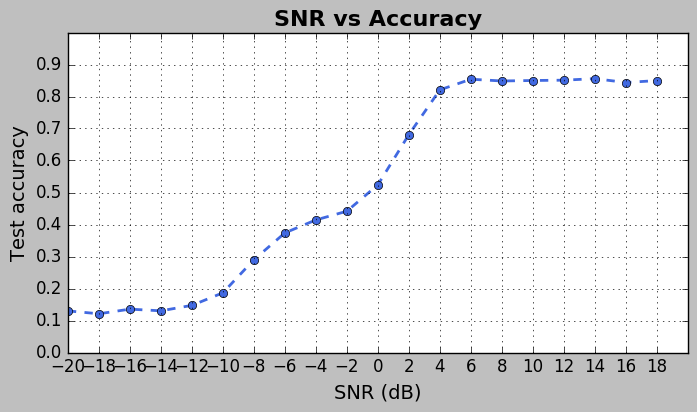

In [5]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()